In [16]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from modules import utils
from pyvis.network import Network

#### The data

In [27]:
# test_df = pd.read_csv('../test_dfs/21_jan/dqn_test_df_13000000.csv')
# test_df = pd.read_csv('../test_dfs/very_simple_datasets/dqn_test_df_11ft_6000000.csv')
test_df = pd.read_csv('../test_dfs/noisiness/0.1.csv')
# test_df = pd.read_csv('../test_dfs/very_simple_datasets/dqn_test_df_8ft_1000000.csv').drop(['index'], axis=1)
test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,is_success
0,0.0,11.0,1.0,1.0,1.0,"['pericardial_effusion', 'cutaneous_lupus', 'a...",0.0,1.0
1,1.0,12.0,1.0,1.0,1.0,"['pericardial_effusion', 'cutaneous_lupus', 'a...",0.0,1.0
2,2.0,11.0,1.0,1.0,1.0,"['pericardial_effusion', 'cutaneous_lupus', 'n...",0.0,1.0
3,3.0,13.0,1.0,1.0,1.0,"['pericardial_effusion', 'cutaneous_lupus', 'a...",0.0,1.0
4,4.0,14.0,1.0,1.0,1.0,"['pericardial_effusion', 'cutaneous_lupus', 'n...",0.0,1.0


In [28]:
pathways_df = utils.create_sankey_df(test_df)
pathways_df['Type'] = 'directed'
pathways_df.head()

,Label1,Label2,value,Type
0,pericardial_effusion,cutaneous_lupus,14000,directed
1,cutaneous_lupus,ana,11638,directed
2,ana,non_scarring_alopecia,7781,directed
3,non_scarring_alopecia,delirium,432,directed
4,delirium,low_c3,923,directed


In [29]:
len(pathways_df)

347

In [30]:
pathways_df[pathways_df.Label1=='Lupus']

,Label1,Label2,value,Type


#### Networkx

In [31]:
import networkx as nx

In [32]:
G = nx.from_pandas_edgelist(pathways_df, source='Label1', target='Label2', edge_attr='value', create_using=nx.DiGraph())

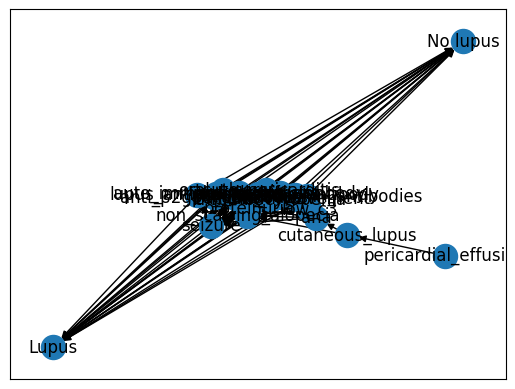

In [33]:
nx.draw_networkx(G, arrows=True)

#### PyVis

In [34]:
# net = Network('500px', notebook=True, cdn_resources='in_line')
net = Network('500px', directed=True, notebook=True, cdn_resources='in_line')
net.from_nx(G)
net.show('example.html')

In [10]:
# nx.draw(G)

In [11]:
# nx.draw_circular(G)

In [12]:
# nx.draw_kamada_kawai(G)

In [13]:
# nx.draw_random(G)

In [14]:
# nx.draw_spring(G)